# **Proyecto: Análisis y Limpieza de Datos sobre Vehículos Eléctricos**

## 🎯 **Objetivo y Contexto**

El crecimiento de los vehículos eléctricos (EVs) ha sido impulsado por la necesidad de reducir las emisiones y fomentar el uso de energías limpias. Sin embargo, analizar datos de estos vehículos puede ser un desafío debido a la inconsistencia y desorden en los registros.

Este proyecto busca limpiar, transformar y analizar el dataset **"Electric Vehicle Population Data (Messy Data)"** para obtener información útil sobre la distribución, adopción y características de los vehículos eléctricos en diferentes regiones.

### 🔍 **Preguntas clave a responder:**
✅ **¿Cuáles son las marcas y modelos más populares?**  
✅ **¿Cómo ha evolucionado el registro de vehículos eléctricos a lo largo del tiempo?**  
✅ **¿Existe una relación entre el precio y la autonomía de los vehículos?**  
✅ **¿Cómo se distribuyen los vehículos eléctricos geográficamente?**  
✅ **¿Cuántos vehículos califican para incentivos de energía limpia?**  

## **1️⃣ Limpieza y Normalización de Datos**

Los datos suelen contener inconsistencias como valores faltantes, formatos incorrectos o duplicados. En esta sección, nos enfocaremos en:

### 📌 **Tareas a realizar:**
- 🔹 **Identificar y manejar valores faltantes** en columnas clave (*County, City, Electric Range, Base MSRP, Legislative District*).
- 🔹 **Convertir los datos a los tipos adecuados**, por ejemplo, asegurando que códigos postales sean *strings* y rangos eléctricos sean enteros.
- 🔹 **Extraer coordenadas geográficas** de la columna *Vehicle Location* para su uso posterior en mapas.

### 📊 **Gráfico:**
📍 **Histograma:** *Distribución de la autonomía (Electric Range) antes y después de la limpieza* para visualizar cambios en la calidad de los datos.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [3]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10


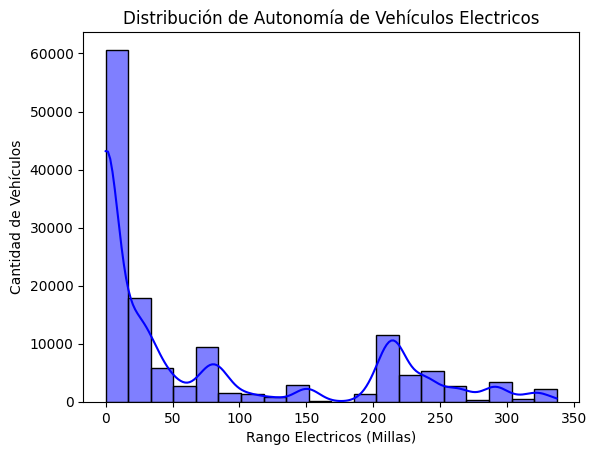

In [4]:
# Histograma de Electric Range antes y después de limpieza

plt.Figure(figsize=(10,5))
sns.histplot(df['Electric Range'], bins=20, kde=True, color='blue')
plt.title('Distribución de Autonomía de Vehículos Electricos')
plt.xlabel('Rango Electricos (Millas)')
plt.ylabel('Cantidad de Vehículos')
plt.show()

In [5]:
# --------- Limpieza y Normalización de los datos ----------- #
# Manejar los datos faltantes

df.fillna(
    {'County': 'unknown', 
    'City': 'unknown',
    'Electric Range': df['Electric Range'].median(),
    'Base MSRP': df['Base MSRP'].median(),
    'Legislative District': 'unknown'
    }, inplace=True)

# Conversión de tipos de datos
df['Postal Code'] = df['Postal Code'].astype(str)
df['Electric Range'] = df['Electric Range'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135038 non-null  object 
 2   City                                               135038 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135038 non-null  object 
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

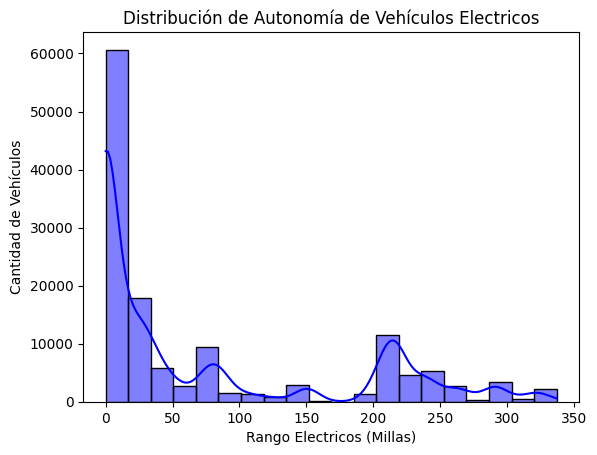

In [6]:
# Histograma de Electric Range antes y después de limpieza

plt.Figure(figsize=(10,5))
sns.histplot(df['Electric Range'], bins=20, kde=True, color='blue')
plt.title('Distribución de Autonomía de Vehículos Electricos')
plt.xlabel('Rango Electricos (Millas)')
plt.ylabel('Cantidad de Vehículos')
plt.show()

## **2️⃣ Análisis de Adopción de Vehículos Eléctricos**

Queremos entender cómo ha crecido la adopción de los EVs, qué marcas dominan el mercado y qué tipos de vehículos son más comunes.

### 📌 **Tareas a realizar:**
- 🔹 **Identificar las marcas y modelos más populares** basándonos en el número de registros.
- 🔹 **Analizar la evolución de los registros** a lo largo del tiempo con la columna *Model Year*.
- 🔹 **Comparar la proporción de diferentes tipos de vehículos eléctricos** (*Battery Electric Vehicle (BEV)* vs. *Plug-in Hybrid Electric Vehicle (PHEV)*).

### 📊 **Gráficos:**
📍 **Gráfico de barras:** *Top 10 marcas con más vehículos registrados* para ver qué fabricantes dominan el mercado.  
📍 **Gráfico de líneas:** *Evolución de los registros de vehículos eléctricos por año* para identificar tendencias en la adopción.  


In [11]:
df['Make'].value_counts()

Make
TESLA                   61808
NISSAN                  13150
CHEVROLET               11437
FORD                     6897
BMW                      5895
KIA                      5491
TOYOTA                   4883
VOLKSWAGEN               3526
VOLVO                    3221
AUDI                     2727
JEEP                     2615
HYUNDAI                  2395
CHRYSLER                 2237
RIVIAN                   1806
PORSCHE                   952
FIAT                      807
HONDA                     787
MERCEDES-BENZ             777
MITSUBISHI                748
MINI                      742
POLESTAR                  658
SMART                     277
SUBARU                    272
JAGUAR                    222
LINCOLN                   212
LUCID                     141
CADILLAC                  120
LEXUS                      80
GENESIS                    67
LAND ROVER                 43
FISKER                     15
MAZDA                      12
AZURE DYNAMICS              8
TH!NK

C:\Users\insit\AppData\Local\Temp\ipykernel_28004\815482437.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_brands.index, y= top_brands.values, palette='viridis')


<Axes: title={'center': 'Top 10 Marcas Vehiculos Eléctricos Registrados'}, xlabel='Marcas', ylabel='Cantidad de Registros'>

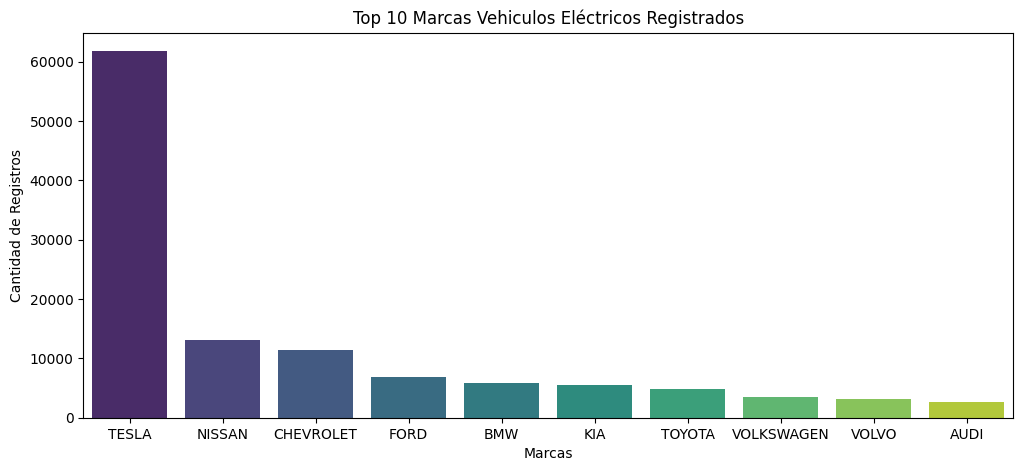

In [16]:
# ---------------- Análisis de adopción de vehículos eléctricos ------------------------
# Top 10 Marcas con más registros
top_brands = df['Make'].value_counts().head(10)
plt.figure(figsize=(12,5))
plt.title('Top 10 Marcas Vehiculos Eléctricos Registrados')
plt.xlabel('Marcas')
plt.ylabel('Cantidad de Registros')
sns.barplot(x= top_brands.index, y= top_brands.values, palette='viridis')


In [28]:
# ----------- Evaluación de registros de vehículos eléctricos por año
data_model_year = df.groupby('Model Year').size()
print(df.groupby('Model Year').size())

Model Year
1997        1
1998        1
1999        4
2000        9
2002        2
2003        1
2008       20
2010       23
2011      815
2012     1657
2013     4598
2014     3601
2015     4925
2016     5688
2017     8579
2018    14343
2019    10577
2020    11151
2021    18554
2022    27983
2023    22476
2024       30
dtype: int64


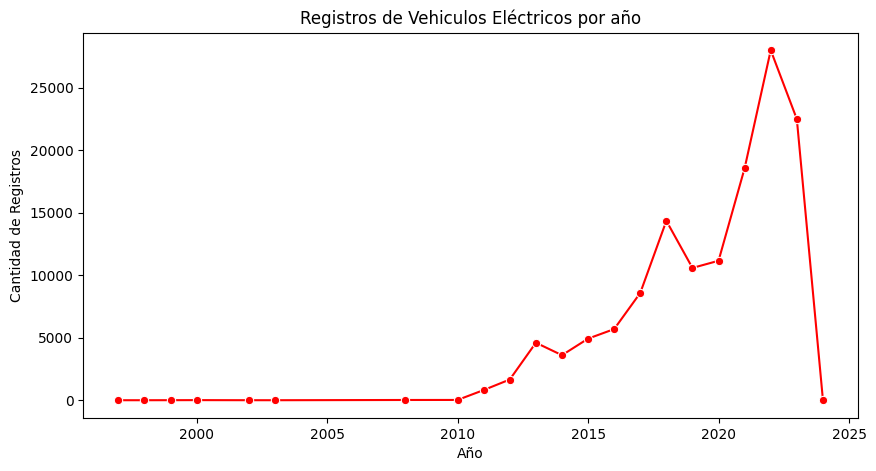

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Registros de Vehiculos Eléctricos por año')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de Registros')
sns.lineplot(data= data_model_year, marker= 'o', color= 'red')
plt.show()

In [33]:
df_filter = df[(df['Model Year'] >= 2000) & (df['Model Year'] <= 2024)]
filter_data_model_year = df_filter.groupby('Model Year').size()
print(filter_data_model_year)

Model Year
2000        9
2002        2
2003        1
2008       20
2010       23
2011      815
2012     1657
2013     4598
2014     3601
2015     4925
2016     5688
2017     8579
2018    14343
2019    10577
2020    11151
2021    18554
2022    27983
2023    22476
2024       30
dtype: int64


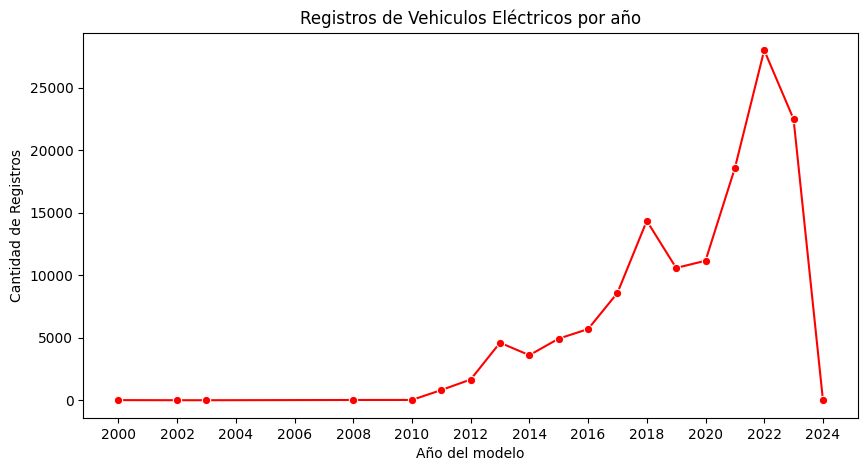

In [38]:
plt.figure(figsize=(10,5))
plt.title('Registros de Vehiculos Eléctricos por año')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de Registros')
sns.lineplot(data= filter_data_model_year, marker= 'o', color= 'red')
plt.xticks(ticks=range(2000,2025,2))
plt.show()

## **3️⃣ Impacto de la Autonomía y el Precio en la Adopción**

¿La autonomía de un vehículo eléctrico influye en su popularidad? ¿El precio afecta la cantidad de unidades registradas? Aquí analizamos la relación entre estos factores.

### 📌 **Tareas a realizar:**
- 🔹 **Examinar la relación entre Electric Range (autonomía) y Base MSRP (precio base).**
- 🔹 **Determinar si los modelos con mayor autonomía son los más registrados.**
- 🔹 **Comparar la distribución de precios entre diferentes tipos de vehículos eléctricos.**

### 📊 **Gráfico:**
📍 **Scatter Plot:** *Autonomía vs. Precio base* para ver si hay una correlación entre estos dos factores.


In [42]:
df['Base MSRP']

0             0.0
1             0.0
2             0.0
3             0.0
4         69900.0
           ...   
135033        0.0
135034        0.0
135035        0.0
135036        0.0
135037        0.0
Name: Base MSRP, Length: 135038, dtype: float64

In [41]:
df['Base MSRP'].value_counts()

Base MSRP
0.0         131613
69900.0       1432
31950.0        400
52900.0        214
32250.0        152
54950.0        136
59900.0        127
39995.0        122
36900.0        100
44100.0         97
64950.0         86
45600.0         75
33950.0         74
34995.0         63
52650.0         63
55700.0         51
36800.0         49
53400.0         36
110950.0        20
98950.0         20
81100.0         18
90700.0         17
75095.0         16
102000.0        15
184400.0        11
43700.0         11
109000.0         7
89100.0          6
32995.0          3
91250.0          3
845000.0         1
Name: count, dtype: int64

In [43]:
df['Electric Range']

0         220
1           0
2         266
3         322
4         208
         ... 
135033    330
135034      0
135035      0
135036      0
135037     19
Name: Electric Range, Length: 135038, dtype: int64

In [44]:
df['Electric Range'].value_counts()

Electric Range
0      56983
215     6440
220     4163
84      4041
238     3509
       ...  
74         4
95         3
57         1
11         1
59         1
Name: count, Length: 102, dtype: int64

In [45]:
df_filter = df[(df['Base MSRP'] > 1000) & (df['Base MSRP'] < 200000)]
df_filter.groupby('Base MSRP').size()

Base MSRP
31950.0      400
32250.0      152
32995.0        3
33950.0       74
34995.0       63
36800.0       49
36900.0      100
39995.0      122
43700.0       11
44100.0       97
45600.0       75
52650.0       63
52900.0      214
53400.0       36
54950.0      136
55700.0       51
59900.0      127
64950.0       86
69900.0     1432
75095.0       16
81100.0       18
89100.0        6
90700.0       17
91250.0        3
98950.0       20
102000.0      15
109000.0       7
110950.0      20
184400.0      11
dtype: int64

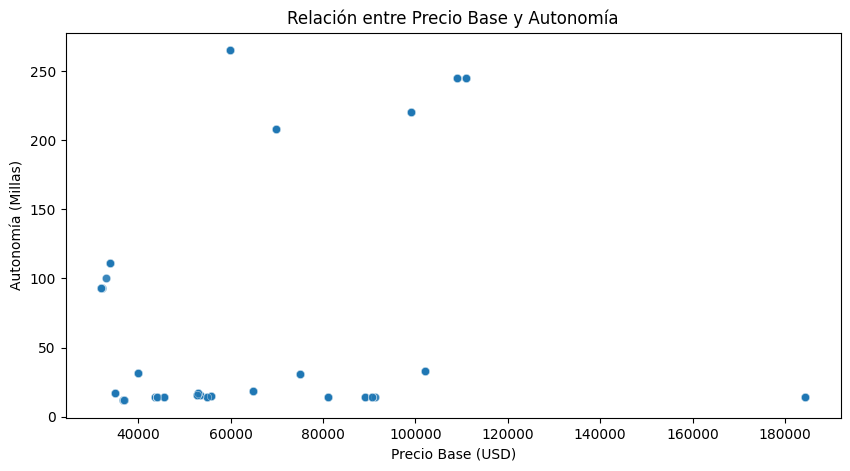

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= df_filter['Base MSRP'], y= df_filter['Electric Range'], alpha= 0.5)
plt.title('Relación entre Precio Base y Autonomía')
plt.xlabel('Precio Base (USD)')
plt.ylabel('Autonomía (Millas)')
plt.show()

## **4️⃣ Elegibilidad para Programas de Combustible Alternativo**

El acceso a incentivos gubernamentales puede influir en la compra de EVs. Vamos a explorar cuántos vehículos cumplen con los requisitos para estos programas.

### 📌 **Tareas a realizar:**
- 🔹 **Determinar la cantidad de vehículos elegibles vs. no elegibles** para programas de combustible alternativo.
- 🔹 **Analizar si los vehículos elegibles tienen características comunes,** como mayor autonomía o menor precio.

### 📊 **Gráfico:**
📍 **Gráfico de pastel:** *Proporción de vehículos elegibles vs. no elegibles* para incentivos gubernamentales.

In [49]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

0                   Clean Alternative Fuel Vehicle Eligible
1         Eligibility unknown as battery range has not b...
2                   Clean Alternative Fuel Vehicle Eligible
3                   Clean Alternative Fuel Vehicle Eligible
4                   Clean Alternative Fuel Vehicle Eligible
                                ...                        
135033              Clean Alternative Fuel Vehicle Eligible
135034    Eligibility unknown as battery range has not b...
135035    Eligibility unknown as battery range has not b...
135036    Eligibility unknown as battery range has not b...
135037                Not eligible due to low battery range
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, Length: 135038, dtype: object

In [52]:
elegibility_count = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(elegibility_count)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         61221
Eligibility unknown as battery range has not been researched    56983
Not eligible due to low battery range                           16834
Name: count, dtype: int64


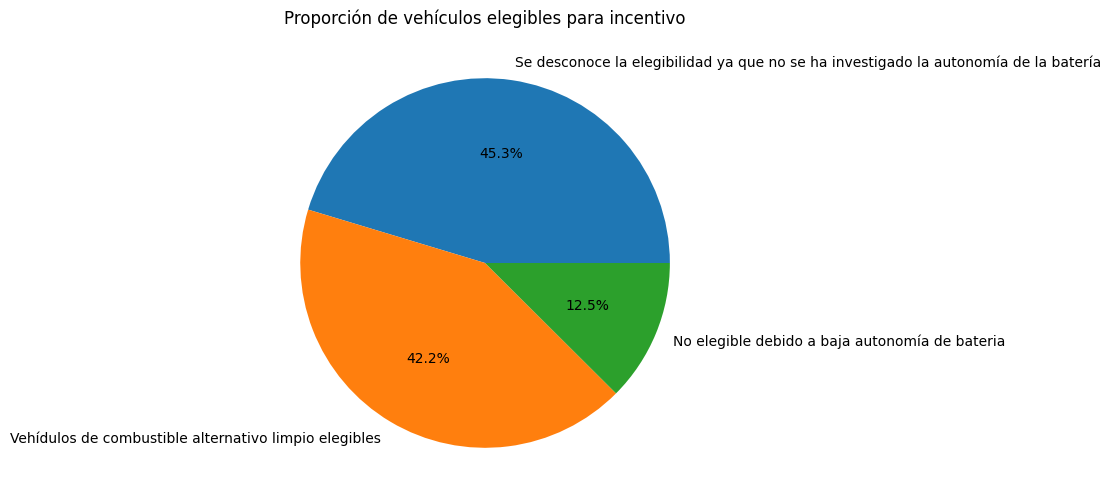

In [55]:
plt.figure(figsize=(6,6))
plt.pie(elegibility_count, labels=[
    'Se desconoce la elegibilidad ya que no se ha investigado la autonomía de la batería', 'Vehídulos de combustible alternativo limpio elegibles', 'No elegible debido a baja autonomía de bateria'],
        autopct='%1.1f%%')
plt.title('Proporción de vehículos elegibles para incentivo')
plt.show()